# Hierarchical clustering and k_means on Iris dataset
### by maryam babaei

### ۱.اضافه کردن کتابخانه های مورد نیاز برای محاسبات ماتریسی و رسم نمودار ها

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

### ۲.خواندن داده ها 

In [2]:
iris_data = pd.read_csv('Iris.csv')

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### ۳. حذف ستون کلاس و نمایش نمودار داده ها بدون کلاس بندی

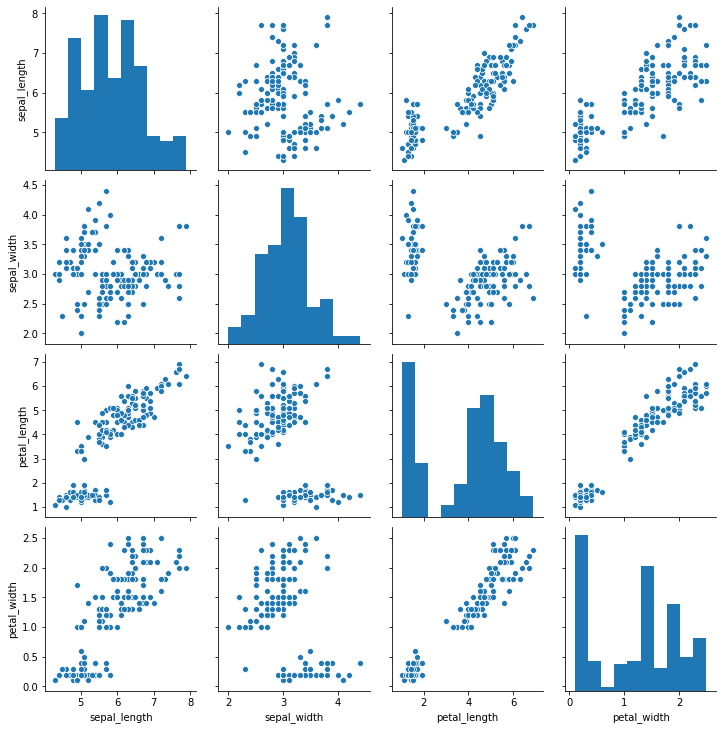

In [4]:
iris_data.drop(['class'], axis=1, inplace = True)
sns.pairplot(iris_data)

### ۴. انتخاب ستون های  petal_length و petal_width و رسم نمودار ان ها

In [5]:
 iris_data = iris_data[['petal_length', 'petal_width']]

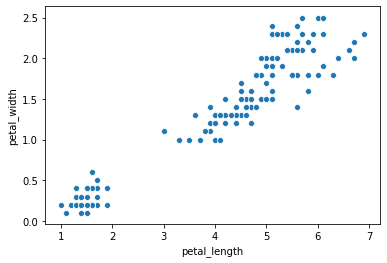

In [6]:
sns.scatterplot(x = "petal_length", y = "petal_width", data = iris_data)

### ۵. فراخوانی تابع Hierarchical clustering و fit کردن مدل

In [7]:
model= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit_predict(iris_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### ۶. رسم نمودار برای مشاهده ی نتیجه

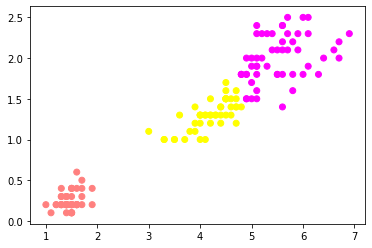

In [8]:
plt.scatter(iris_data['petal_length'] ,iris_data['petal_width'], c= model.labels_, cmap='spring')

### ۷.تعریف تابع برای رسم درخت دندوگرام

In [9]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

### ۸.fit کردن دوباره مدل بدون تعداد clusters 

In [10]:
X=iris_data
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

### ۹. رسم درخت دندوگرام 

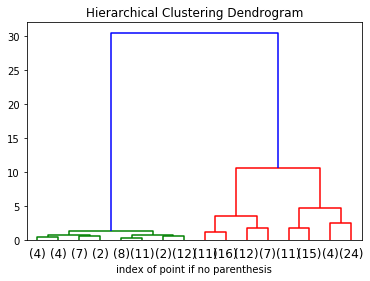

In [11]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("index of point if no parenthesis")
plt.show()

### ۱۰.فراخوانی تابع kMeans و fit کردن مدل 

In [12]:
model = KMeans(n_clusters = 3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### ۱۱.محاسبه score

In [13]:
iris = pd.read_csv('Iris.csv')
y=iris['class']
model.score(X,y)

-31.38775897435904

### ۱۲. رسم نمودار برای مشاهده ی نتیجه

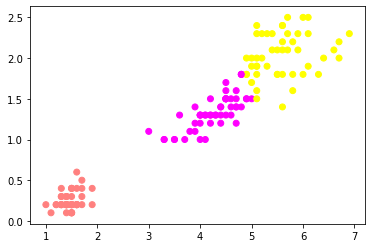

In [14]:
labels = model.predict(X)
plt.scatter(iris_data['petal_length'] ,iris_data['petal_width'], c = labels, cmap='spring')